# Optimizing Model

## Hidden Layers and Activation Functions

### Hidden layers and Nodes

Reducing number of `Layers` would need more `epochs` ~ 500-1000
```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim=3))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="linear"))
```

Using too few neurons in the `Layers` will result in underfitting.

Using too many neurons in the `Layers` may result in overfitting and taking more time to train.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following: The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. The number of hidden neurons should be less than twice the size of the input layer. [link](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

### Activation functions 

Activation functions work best in their default hyperparameters that are used in popular frameworks such as Tensorflow and Pytorch.

`ReLU` function is widely used.

Activation functions for Classification ML: `softmax`, `sigmoid`, `Tanh`.

### In this project, `ReLU` seems to be the best fit for activation function.

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import MinMaxScaler, StandardScaler
# FUNCTIONS
from functions import *

## Import data

In [18]:
filename_alldata = "data/_nanocomposite_data.csv"
alldata = pd.read_csv(filename_alldata, index_col=None, header=0)
# Drop columns which are not used for now
alldata_clean = alldata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
alldata_clean = mapStringToNum(alldata_clean)
alldata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polymer_1     5000 non-null   int64  
 1   filler_1      5000 non-null   int64  
 2   wt_l1         5000 non-null   float64
 3   conductivity  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## Prepare Dataset for TensorFlow

### Scaling X and Y data
X data might not need scaling as the range of values is not high.

In [3]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = superHighVariationScaler() 

### Splitting data to training and testing sets

In [4]:
training_data, testing_data = train_test_split(alldata_clean, test_size=0.2, random_state=25)

In [5]:
# Split into input features (X) and output labels (Y) variables
X_training = training_data.drop('conductivity', axis=1).values
Y_training = training_data[['conductivity']].values

# Pull out columns for X (data to train with) and Y (value to predict)
X_testing = testing_data.drop('conductivity', axis=1).values
Y_testing = testing_data[['conductivity']].values

### Scaling data

In [6]:
# Scale both the training inputs and outputs
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

# It's very important that the training and test data are scaled with the same scaler.
X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

# Model build and complie

In [36]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu", input_dim=3))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
             metrics = tf.keras.metrics.MeanSquaredLogarithmicError() )

In [37]:
history = model.fit(X_scaled_training, Y_scaled_training, 
                    validation_data=(X_scaled_testing, Y_scaled_testing), 
                    epochs=200, batch_size=64)

Epoch 1/200
63/63 [==============================] - 1s 6ms/step - loss: 104.8891 - mean_squared_logarithmic_error: 0.1858 - val_loss: 99.5350 - val_mean_squared_logarithmic_error: 0.1752
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 101.4971 - mean_squared_logarithmic_error: 0.1838 - val_loss: 99.4876 - val_mean_squared_logarithmic_error: 0.1742
Epoch 3/200
63/63 [==============================] - 0s 3ms/step - loss: 101.8944 - mean_squared_logarithmic_error: 0.1817 - val_loss: 99.2869 - val_mean_squared_logarithmic_error: 0.1721
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 103.1290 - mean_squared_logarithmic_error: 0.1826 - val_loss: 99.7417 - val_mean_squared_logarithmic_error: 0.1720
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 100.4824 - mean_squared_logarithmic_error: 0.1817 - val_loss: 100.0342 - val_mean_squared_logarithmic_error: 0.1741
Epoch 6/200
63/63 [==============================] - 0s 3ms

Epoch 88/200
63/63 [==============================] - 0s 3ms/step - loss: 70.7313 - mean_squared_logarithmic_error: 0.1077 - val_loss: 68.7992 - val_mean_squared_logarithmic_error: 0.1017
Epoch 89/200
63/63 [==============================] - 0s 3ms/step - loss: 70.6362 - mean_squared_logarithmic_error: 0.1086 - val_loss: 67.9402 - val_mean_squared_logarithmic_error: 0.1044
Epoch 90/200
63/63 [==============================] - 0s 3ms/step - loss: 68.8317 - mean_squared_logarithmic_error: 0.1095 - val_loss: 67.5897 - val_mean_squared_logarithmic_error: 0.1020
Epoch 91/200
63/63 [==============================] - 0s 3ms/step - loss: 67.1573 - mean_squared_logarithmic_error: 0.1070 - val_loss: 69.0445 - val_mean_squared_logarithmic_error: 0.1036
Epoch 92/200
63/63 [==============================] - 0s 3ms/step - loss: 70.8237 - mean_squared_logarithmic_error: 0.1077 - val_loss: 70.8498 - val_mean_squared_logarithmic_error: 0.1022
Epoch 93/200
63/63 [==============================] - 0s 3ms

63/63 [==============================] - 0s 3ms/step - loss: 46.3937 - mean_squared_logarithmic_error: 0.0445 - val_loss: 48.7337 - val_mean_squared_logarithmic_error: 0.0415
Epoch 175/200
63/63 [==============================] - 0s 3ms/step - loss: 45.3051 - mean_squared_logarithmic_error: 0.0440 - val_loss: 53.6613 - val_mean_squared_logarithmic_error: 0.0415
Epoch 176/200
63/63 [==============================] - 0s 3ms/step - loss: 49.9112 - mean_squared_logarithmic_error: 0.0440 - val_loss: 48.9964 - val_mean_squared_logarithmic_error: 0.0407
Epoch 177/200
63/63 [==============================] - 0s 3ms/step - loss: 47.9149 - mean_squared_logarithmic_error: 0.0432 - val_loss: 48.1729 - val_mean_squared_logarithmic_error: 0.0399
Epoch 178/200
63/63 [==============================] - 0s 3ms/step - loss: 46.3697 - mean_squared_logarithmic_error: 0.0428 - val_loss: 48.5977 - val_mean_squared_logarithmic_error: 0.0401
Epoch 179/200
63/63 [==============================] - 0s 3ms/step - 

## Plotting predicting vs testing data

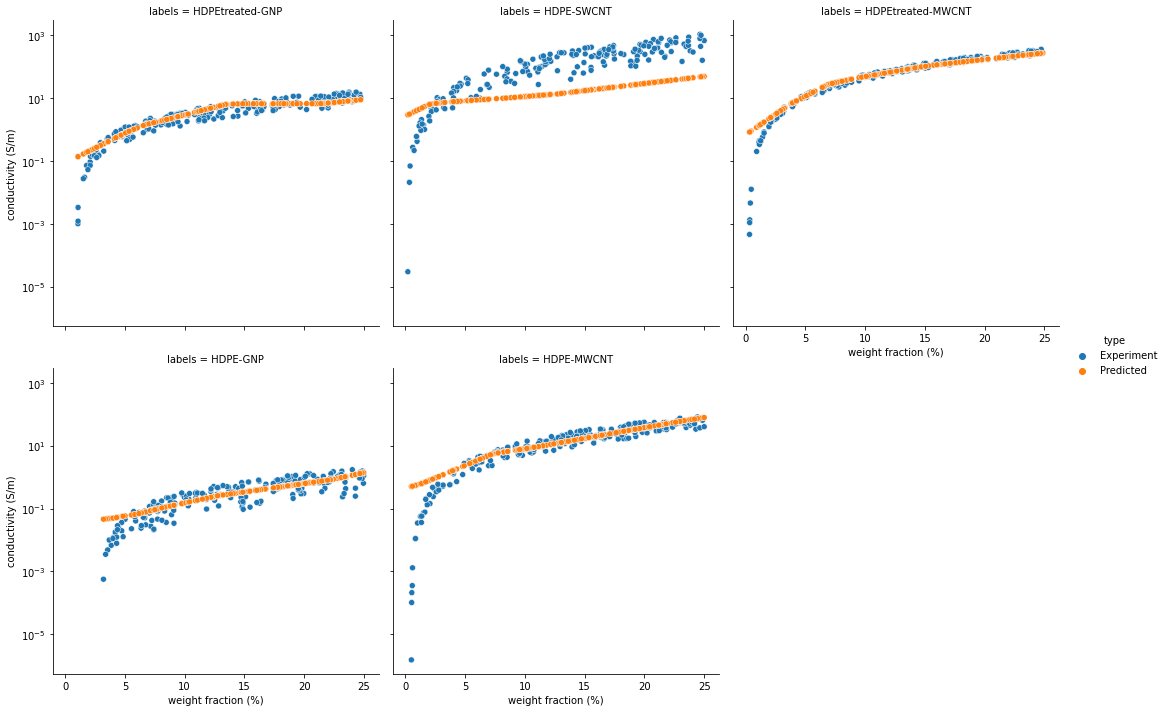

In [38]:
# Calculate predictions
PredValSet = model.predict(X_scaled_testing)
PredValSet2 = Y_scaler.inverse_transform(PredValSet)

compdata = testing_data.copy()
compdata = mapNumToString (compdata)

compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1']
compdata['type'] = 'Experiment'
compdata2 = compdata.copy()
compdata2['type'] = 'Predicted'
compdata2['conductivity'] = PredValSet2

compdata = compdata.append(compdata2, ignore_index = True)

g = sns.relplot(data=compdata ,x="wt_l1", y ="conductivity", hue="type", col="labels", kind="scatter", col_wrap =3  );
g.set_xlabels("weight fraction (%)");
g.set_ylabels("conductivity (S/m)");
g.set(yscale="log");

# Extrapolation: Estimate higher wt (>25%)

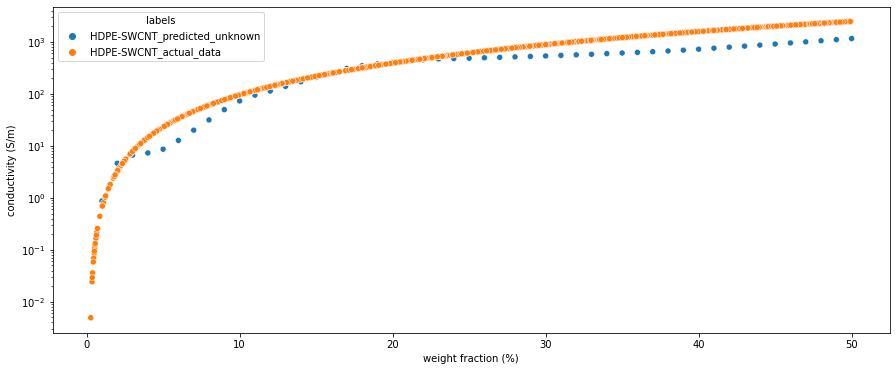

In [10]:
filename_unknowndata7 = "data-evaluation/HDPE_SWCNT_data-set-7.csv"
unknowndata7 = pd.read_csv(filename_unknowndata7, index_col=None, header=0)
unknowndata7.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1, inplace=True)   #,'foaming'
unknowndata7_clean = unknowndata7.copy()
unknowndata7_clean = mapStringToNum(unknowndata7_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata7 = unknowndata7_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata7 = X_scaler.transform(X_unknowndata7)
# Calculate predictions
PredValSet_unknowndata7 = model.predict(X_scaled_unknowndata7)
PredValSet_unknowndata72 = Y_scaler.inverse_transform(PredValSet_unknowndata7)
compdata = unknowndata7.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata72
######################
filename_data8 = "data-evaluation/HDPE_SWCNT_data-set-8.csv"
data8 = pd.read_csv(filename_data8, index_col=None, header=0)
data8['labels']= data8['polymer_1'] + "-" + data8['filler_1'] + "_actual_data"
######################
compdata = compdata.append(data8, ignore_index = True)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
g = sns.scatterplot(data=compdata ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax ,markers=["-","x"] );

# Predicting unknow case - treated HDPE + SWCNT

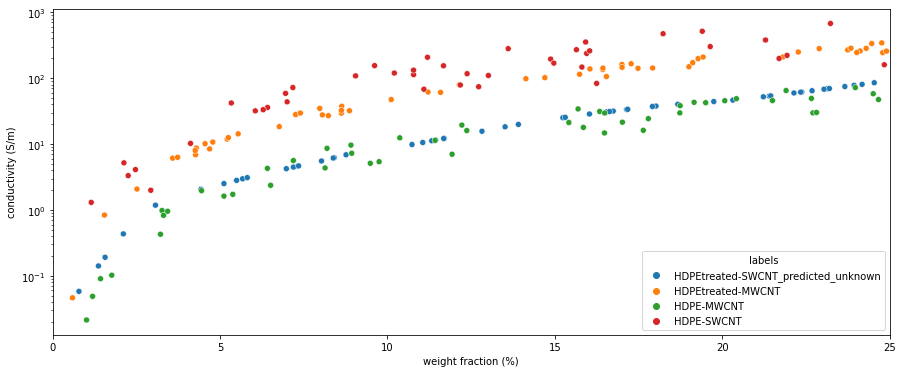

In [11]:
filename_HDPEtreated_SWCNT = "data-evaluation/HDPEtreated_SWCNT_data-set-6.csv"
data_HDPEtreated_SWCNT = pd.read_csv(filename_HDPEtreated_SWCNT, index_col=None, header=0)
data_HDPEtreated_SWCNT_clean = data_HDPEtreated_SWCNT.drop(
                                    ['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
unknowndata = data_HDPEtreated_SWCNT_clean.copy()
unknowndata['conductivity'] = float("NaN")
unknowndata_clean = unknowndata.copy()
unknowndata_clean = mapStringToNum (unknowndata_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata = unknowndata_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata = X_scaler.transform(X_unknowndata)
# Calculate predictions
PredValSet_unknowndata = model.predict(X_scaled_unknowndata)
PredValSet_unknowndata2 = Y_scaler.inverse_transform(PredValSet_unknowndata)
compdata = unknowndata.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata2

alldata['labels']    = alldata['polymer_1'] + "-" + alldata['filler_1']
compdata1 = alldata[alldata['filler_1'] != "GNP" ].copy()

compdata = compdata.append(compdata1, ignore_index = True)

# reduce data rows to 5% (sparse data)
drop_indices = np.random.choice(compdata.index, int(np.ceil(len(compdata.index) * 0.95) ) , replace=False)
compdata_subset = compdata.drop(drop_indices)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
plt.xlim([0,25])
g = sns.scatterplot(data=compdata_subset ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax )


# Conclusion

## Less room for improvement

More time needed to fine-tune better.
